In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import itertools
import csv
%matplotlib inline

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [3]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

### Mushroom Dataset

In [4]:
mushroom = pd.read_csv("newMushroom10noise.csv", sep=',')
data = mushroom.iloc[:,1:23]
labels = mushroom.iloc[:,23].astype(str)

             precision    recall  f1-score   support

          p       0.84      0.92      0.87      1748
          e       0.84      0.71      0.77      1074

avg / total       0.84      0.84      0.83      2822

accuracy:  0.836640680368533


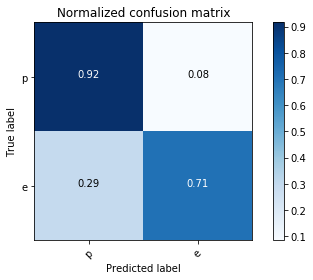

             precision    recall  f1-score   support

          p       0.82      0.91      0.86      1740
          e       0.83      0.68      0.74      1082

avg / total       0.82      0.82      0.82      2822

accuracy:  0.8221119773210489


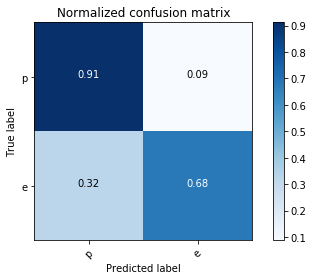

             precision    recall  f1-score   support

          p       0.82      0.90      0.86      1747
          e       0.81      0.69      0.75      1075

avg / total       0.82      0.82      0.82      2822

accuracy:  0.8203401842664777


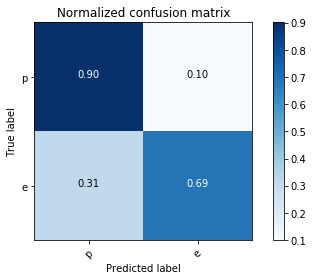

             precision    recall  f1-score   support

          p       0.83      0.93      0.88      1741
          e       0.85      0.70      0.77      1081

avg / total       0.84      0.84      0.84      2822

accuracy:  0.8391211906449326


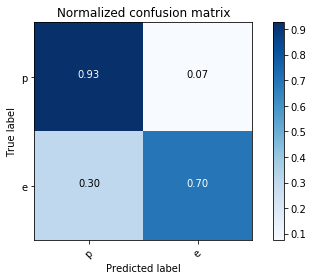

             precision    recall  f1-score   support

          p       0.83      0.94      0.88      1730
          e       0.88      0.68      0.77      1092

avg / total       0.85      0.84      0.84      2822

accuracy:  0.8426647767540751


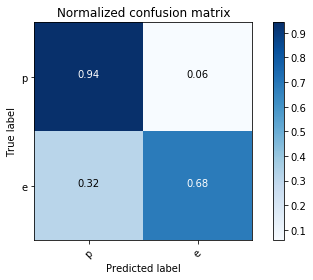

             precision    recall  f1-score   support

          p       0.83      0.90      0.86      1758
          e       0.80      0.69      0.74      1064

avg / total       0.82      0.82      0.82      2822

accuracy:  0.8182140326009922


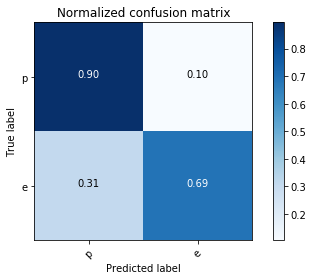

             precision    recall  f1-score   support

          p       0.83      0.93      0.87      1734
          e       0.86      0.69      0.76      1088

avg / total       0.84      0.84      0.83      2822

accuracy:  0.8359319631467045


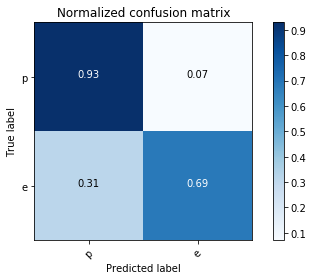

             precision    recall  f1-score   support

          p       0.83      0.90      0.87      1754
          e       0.81      0.70      0.75      1068

avg / total       0.83      0.83      0.82      2822

accuracy:  0.8263642806520198


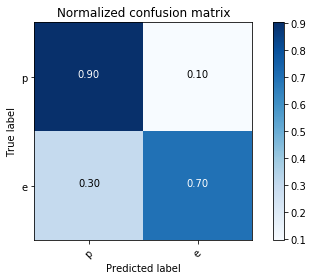

             precision    recall  f1-score   support

          p       0.83      0.92      0.87      1757
          e       0.84      0.69      0.76      1065

avg / total       0.83      0.83      0.83      2822

accuracy:  0.8330970942593905


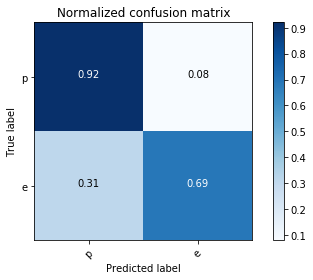

             precision    recall  f1-score   support

          p       0.83      0.90      0.86      1731
          e       0.82      0.71      0.76      1091

avg / total       0.83      0.83      0.82      2822

accuracy:  0.8267186392629341


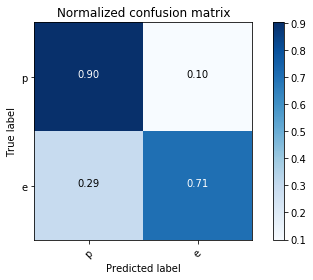

In [5]:
acc=[]
acc.append("Mushroom")
for i in range(5):
    for train_index, test_index in kf.split(mushroom):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = GaussianNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Appendicitis Dataset

In [6]:
appendicitis = pd.read_csv("appendicitis10noise.csv", sep=',')
data = appendicitis.iloc[:,1:8]
labels = appendicitis.iloc[:,8].astype(str)

             precision    recall  f1-score   support

          1       0.89      0.93      0.91        43
          0       0.62      0.50      0.56        10

avg / total       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


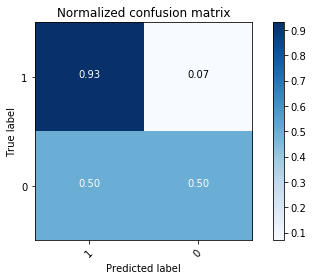

             precision    recall  f1-score   support

          1       0.95      0.86      0.90        42
          0       0.60      0.82      0.69        11

avg / total       0.88      0.85      0.86        53

accuracy:  0.8490566037735849


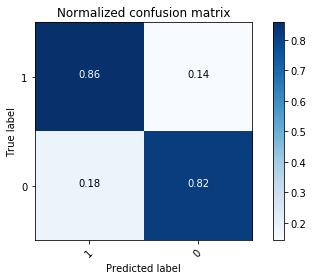

             precision    recall  f1-score   support

          1       0.95      0.93      0.94        45
          0       0.67      0.75      0.71         8

avg / total       0.91      0.91      0.91        53

accuracy:  0.9056603773584906


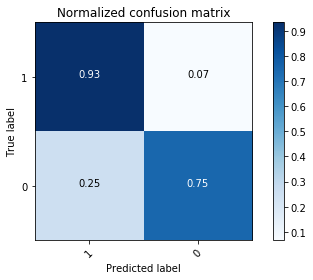

             precision    recall  f1-score   support

          1       0.88      0.93      0.90        40
          0       0.73      0.62      0.67        13

avg / total       0.84      0.85      0.84        53

accuracy:  0.8490566037735849


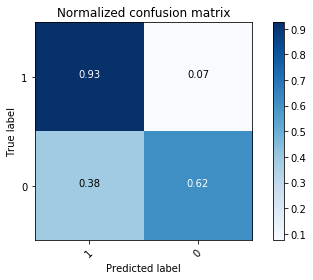

             precision    recall  f1-score   support

          1       0.91      0.98      0.94        42
          0       0.88      0.64      0.74        11

avg / total       0.90      0.91      0.90        53

accuracy:  0.9056603773584906


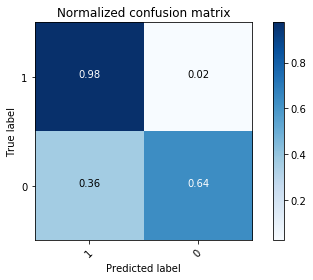

             precision    recall  f1-score   support

          1       0.93      0.86      0.89        43
          0       0.54      0.70      0.61        10

avg / total       0.85      0.83      0.84        53

accuracy:  0.8301886792452831


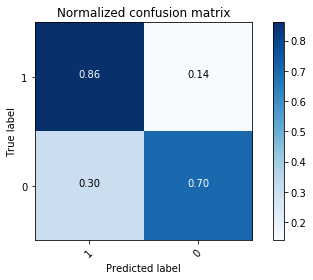

             precision    recall  f1-score   support

          1       0.90      0.90      0.90        42
          0       0.64      0.64      0.64        11

avg / total       0.85      0.85      0.85        53

accuracy:  0.8490566037735849


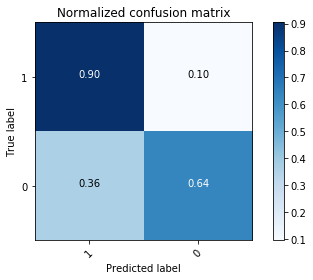

             precision    recall  f1-score   support

          1       0.93      0.88      0.90        43
          0       0.58      0.70      0.64        10

avg / total       0.86      0.85      0.85        53

accuracy:  0.8490566037735849


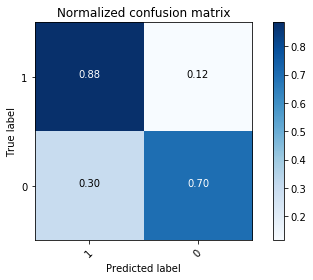

             precision    recall  f1-score   support

          1       0.90      0.88      0.89        43
          0       0.55      0.60      0.57        10

avg / total       0.84      0.83      0.83        53

accuracy:  0.8301886792452831


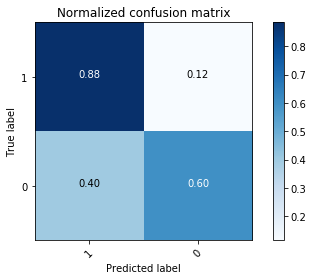

             precision    recall  f1-score   support

          1       0.93      0.95      0.94        42
          0       0.80      0.73      0.76        11

avg / total       0.90      0.91      0.90        53

accuracy:  0.9056603773584906


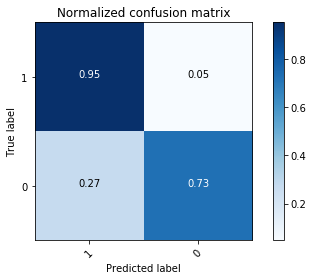

In [7]:
acc.append("Appendicitis")
for i in range(5):
    for train_index, test_index in kf.split(appendicitis):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model_poker = GaussianNB()
        dt_model_poker.fit(X_train, y_train)
        predicted = dt_model_poker.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

### Glass Dataset

In [8]:
glass = pd.read_csv("glass10noise.csv")
data = glass.iloc[:,1:10]
labels = glass.iloc[:,10].astype(str)

             precision    recall  f1-score   support

          1       0.48      0.29      0.36        35
          3       0.31      0.11      0.16        38
          2       1.00      0.14      0.25         7
          5       0.05      0.50      0.09         6
          7       0.00      0.00      0.00         6
          6       1.00      0.47      0.64        15

avg / total       0.47      0.23      0.28       107

accuracy:  0.2336448598130841


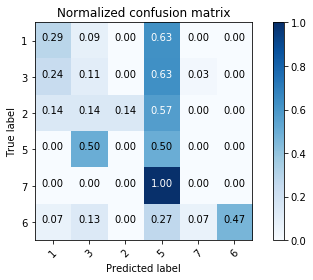

             precision    recall  f1-score   support

          1       0.51      0.71      0.60        35
          3       0.58      0.29      0.39        38
          2       0.00      0.00      0.00        10
          5       0.20      0.14      0.17         7
          7       0.40      0.67      0.50         3
          6       0.65      0.93      0.76        14

avg / total       0.48      0.49      0.46       107

accuracy:  0.48598130841121495


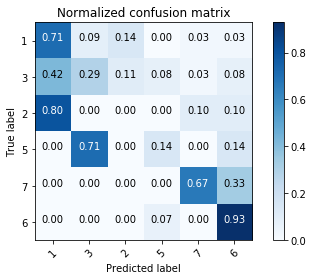

             precision    recall  f1-score   support

          1       0.46      0.84      0.59        37
          3       0.53      0.27      0.36        37
          2       0.00      0.00      0.00        12
          5       0.38      0.50      0.43         6
          7       0.67      1.00      0.80         2
          6       1.00      0.62      0.76        13

avg / total       0.49      0.50      0.46       107

accuracy:  0.5046728971962616


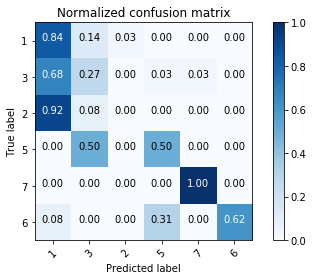

             precision    recall  f1-score   support

          1       0.41      0.61      0.49        33
          3       0.38      0.13      0.19        39
          2       0.00      0.00      0.00         5
          5       0.33      0.57      0.42         7
          7       1.00      0.29      0.44         7
          6       0.70      1.00      0.82        16

avg / total       0.46      0.44      0.40       107

accuracy:  0.4392523364485981


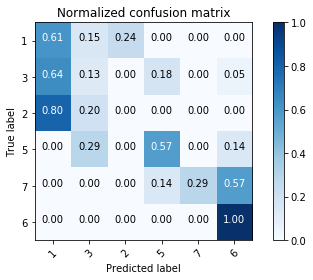

             precision    recall  f1-score   support

          1       0.33      0.03      0.05        40
          3       0.33      0.18      0.23        34
          2       0.08      0.56      0.14         9
          5       0.20      0.20      0.20         5
          7       0.50      0.67      0.57         3
          6       1.00      0.75      0.86        16

avg / total       0.41      0.25      0.26       107

accuracy:  0.2523364485981308


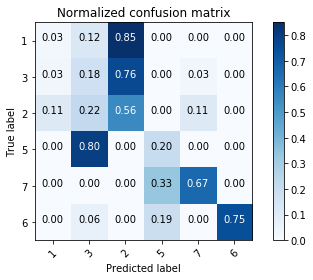

             precision    recall  f1-score   support

          1       0.42      0.80      0.55        30
          3       0.71      0.12      0.20        42
          2       0.00      0.00      0.00         8
          5       0.40      0.75      0.52         8
          7       1.00      0.33      0.50         6
          6       0.67      0.92      0.77        13

avg / total       0.57      0.46      0.40       107

accuracy:  0.45794392523364486


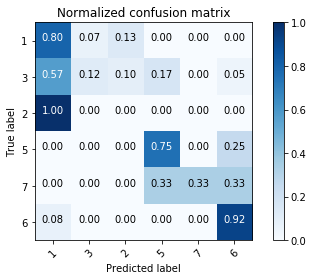

             precision    recall  f1-score   support

          1       0.53      0.78      0.63        37
          3       0.54      0.36      0.43        36
          2       0.17      0.11      0.13         9
          5       0.33      0.50      0.40         8
          7       0.00      0.00      0.00         6
          6       0.86      0.55      0.67        11

avg / total       0.49      0.50      0.47       107

accuracy:  0.4953271028037383


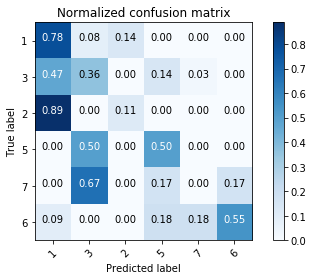

             precision    recall  f1-score   support

          1       0.42      0.76      0.54        33
          3       0.32      0.15      0.20        40
          2       0.00      0.00      0.00         8
          5       0.38      0.60      0.46         5
          7       1.00      0.33      0.50         3
          6       0.83      0.83      0.83        18

avg / total       0.43      0.47      0.42       107

accuracy:  0.4672897196261682


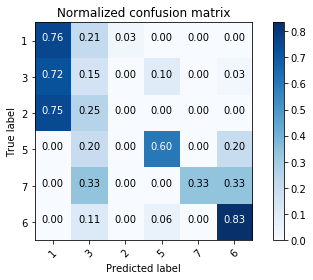

             precision    recall  f1-score   support

          1       0.48      0.94      0.63        33
          3       0.53      0.21      0.30        38
          2       0.00      0.00      0.00         8
          5       0.00      0.00      0.00         8
          7       1.00      0.80      0.89         5
          6       0.81      0.87      0.84        15

avg / total       0.50      0.52      0.46       107

accuracy:  0.5233644859813084


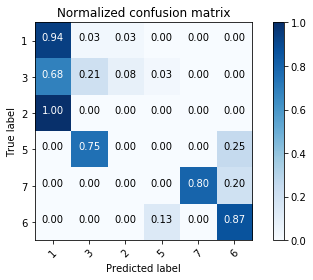

             precision    recall  f1-score   support

          1       0.46      0.68      0.55        37
          3       0.29      0.11      0.15        38
          2       0.11      0.11      0.11         9
          5       0.25      0.60      0.35         5
          7       0.50      0.75      0.60         4
          6       0.83      0.71      0.77        14

avg / total       0.41      0.43      0.39       107

accuracy:  0.42990654205607476


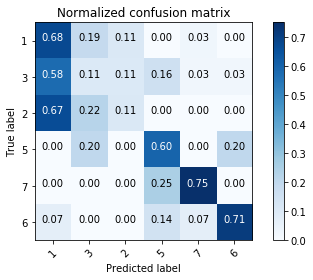

In [9]:
acc.append("Glass")
for i in range(5):
    for train_index, test_index in kf.split(glass):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        dt_model = GaussianNB()
        dt_model.fit(X_train, y_train)
        predicted = dt_model.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            #print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print (classification_report(y_test, predicted, target_names=unique_labels))
        print ("accuracy: ", accuracy_score(y_test, predicted))
        acc.append(accuracy_score(y_test, predicted))
        cnf_matrix = confusion_matrix(y_test, predicted)
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=unique_labels, normalize=True,
                      title='Normalized confusion matrix')
        plt.show()

In [10]:
print (acc)
with open("accNaiveBayesWith10Noise.csv", 'w') as myfile:
    wr = csv.writer(myfile, delimiter='\n')
    wr.writerow(acc)

['Mushroom', 0.836640680368533, 0.8221119773210489, 0.8203401842664777, 0.8391211906449326, 0.8426647767540751, 0.8182140326009922, 0.8359319631467045, 0.8263642806520198, 0.8330970942593905, 0.8267186392629341, 'Appendicitis', 0.8490566037735849, 0.8490566037735849, 0.9056603773584906, 0.8490566037735849, 0.9056603773584906, 0.8301886792452831, 0.8490566037735849, 0.8490566037735849, 0.8301886792452831, 0.9056603773584906, 'Glass', 0.2336448598130841, 0.48598130841121495, 0.5046728971962616, 0.4392523364485981, 0.2523364485981308, 0.45794392523364486, 0.4953271028037383, 0.4672897196261682, 0.5233644859813084, 0.42990654205607476]
